<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_%EC%B4%88%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# youtube 감성분석

## 파일 로드

In [ ]:
with open('0901_suka.txt', 'r') as f:
  a = f.read()
  print(a)

아[음악]wr여러분들 혹시 유튜버 나 스트림 하고싶으십니까유튜브에 스트리머 뭐 아니면 하이트뭐 등등 등등 뭐 웹툰작가 던 모던회사 때로 치고 나와서 뭘 해야지제가 얼마전에 건강검진을 받았는데요지금 차두리 형의 나오더라구요 거기에그 간 때문이야 간 때문이야 너 지금ct 촬영 받고 있습니다 건강조심하시고요 회사 다닐때는 나와서혼자 이런거 하면 되게 편하고 그럴거라고 생각하지만 나오시면 일이 2배줘 ep 2 두 배 벽 왠 차가 이세 배 입니다 3배에 운 없으면 은그 주 80시간 뭐 이렇게 일할 수있어요 조심하셔야 됩니다 조심하세요건강이 나라로 가고 있기 때문에 야이렇게 살면 안 되겠다 그래서안되겠다 고 대학생 들한테 좀물어봤어요 스퀄 도 나 혼자 춤의 팬드니까 너희들은 마이 디어 없냐 고대학생들이 라 그러면은 주무 살에서25 사이죠 물어봤어요 뜬 박스를통해서 혹시 마인이 없냐 모종 내나바라 그랬더니 우리 대학생들이자기들은 얘기하고 싶다 직접 와서모셔놓고 할 수 없으니까 자기들은얘기하고 싶다 라는 주제를보내줬습니다 저 20대의 20살25살 생각은 모르니까 걔들은 이얘기를 처음 봤거든요 보면서 문득해야 했는데 음 여러분도 한번 공감이되던지 벗어 이에게 공감이 되면여러분들의 마음은 대학생 거고요공감이 안 되면 마음이 슈카 인겁니다 자 m 제트 세대의세계관이라는 것이 존재한 야 이게무슨 소리냐 하면 램제트 세대가 늘린2월 제 3 알아 그러잖아요 이게축대 후반 거의 한 16세 에서마우스 투자를 사이인데 왜 뭉뚱그려서한 세대 라고 얘기를 하냐 너희들은md 트 세대의 세계관이 라는게자기가 보기엔 별로 없는데 공통점이없는데 아파트 안아파 아빠다 삼촌인데 40대에서 10 때까지 있는걸왜 이렇게 뭉뚱그려 얘기 아냐 란이런 얘길 하더라구요 그래서 그런가밖에 그런거라 생각이 들어서찾아봤더니 mgx 한 편의 시 탈은게 오늘 거에요 직접적으로 태그 바쓰알겠어 알겠어 비아 델 미안해 내가부르고 난 이집 아이템이 하단 데서봤는데 이 세대를 좀 본거죠 유명한폰 데어 페이 부머 그러면 연령별로짜르

## 문장 토큰화

In [ ]:
!pip install kss

In [ ]:
import kss

[Korean Sentence Splitter]: Initializing Kss...


In [ ]:
print(kss.split_sentences('자연어처리 어렵네. 문장토큰은 왜 안되는 걸까'))

['자연어처리 어렵네.', '문장토큰은 왜 안되는 걸까']


## konlpy 사용

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
from collections import Counter
# 명사 토큰화
noun = okt.nouns(a)

for i, v in enumerate(noun):
  if len(v)<2:
    noun.pop(i)

In [ ]:
cnt = Counter(noun)

In [ ]:
noun_list = cnt.most_common(100) # 빈도수 기준 상위 100개
# for i in noun_list:  # 확인
#   print(i)

In [ ]:
# 한글 폰트 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

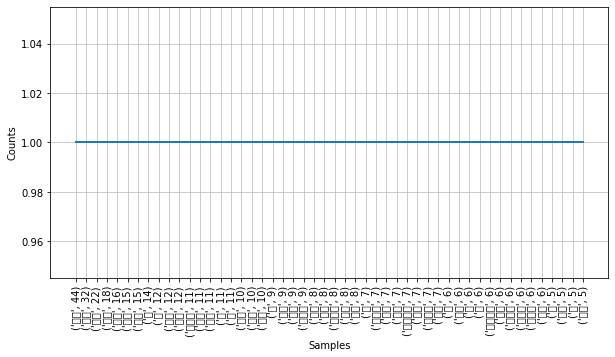

<function matplotlib.pyplot.show>

In [ ]:
import nltk
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
path = '/user/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# plt.rc('font', family=font_name)
# fm._rebuild() # 코랩에서 한글 깨짐-- plt는 해결이 안됨.. 왜?


ko = nltk.Text(noun_list, name='test')
plt.figure(figsize=(10,5))
ko.plot(50)
plt.show

## 시각화- 워드클라우드

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path = path,
               background_color='white',
               width = 150,
               height = 150,
               max_words = 100)

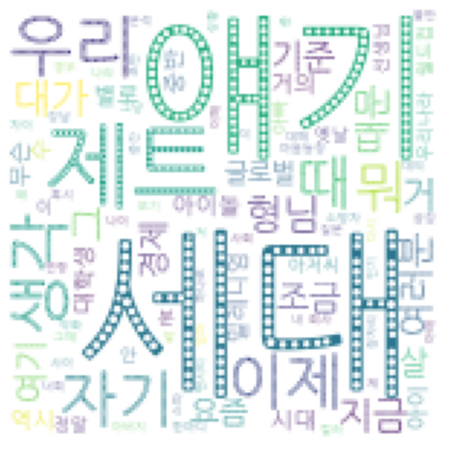

In [ ]:
wc.generate_from_frequencies(dict(noun_list))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wc)
plt.show()

## VADER 감성 어휘사전을 기반으로 한 감성분석

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
senti_score = senti_analyzer.polarity_scores(a)
print(senti_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.996, 'pos': 0.004, 'compound': 0.8442}


compound의 value값이 총 감성 지수

- 뉴스 데이터로 연습

In [ ]:
import pandas as pd

review_df = pd.read_excel('네이버뉴스_본문_삼성전자.xlsx').drop(columns = 'Unnamed: 0')
review_df.head()

,st_n,st_cd,news,date,title,url,text
0,삼성전자,5930,매일경제,2021083115,삼성전자-구찌 협업,http://news.mk.co.kr/newsRead.php?no=841058&ye...,삼성전자가 이탈리아 명품 브랜드 구찌와 함께 전용 디지털 애플리케이션(앱) '가옥 ...
1,삼성전자,5930,매일경제,2021083110,"""이정도일 줄 몰랐다""…플립·폴드 3 '역대급 돌풍'에 삼성전자 결단 내리나",http://news.mk.co.kr/newsRead.php?no=839245&ye...,[사진 제공 = 삼성전자] 갤럭시Z플립3와 Z폴드3 등 3세대 폴더블 스마트폰이 돌...
2,삼성전자,5930,매일경제,2021083017,"삼성전자, 3GPP 의장단 2석 추가 확보",http://news.mk.co.kr/newsRead.php?no=837909&ye...,5G(5세대) 이동통신 표준을 개발하는 3GPP(3rd Generation Par...
3,삼성전자,5930,매일경제,2021083109,"""점유율 0.5% 굴욕 벗어나나""…삼성 폴더블 中 100만명 줄섰다",http://news.mk.co.kr/newsRead.php?no=839050&ye...,갤럭시Z 플립3. [사진 제공=삼성전자] 삼성전자가 중국에서 폴더블폰 신작을 내놓자...
4,삼성전자,5930,매일경제,2021083011,"삼성전자, 3GPP 표준회의서 2개 분과 부의장 배출",http://news.mk.co.kr/newsRead.php?no=835903&ye...,"송재연 연구원(사진 왼쪽), 나렌 탕구두 연구원. [사진 제공 = 삼성전자] 삼성전..."


In [ ]:
senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
senti_score = senti_analyzer.polarity_scores(review_df['text'][0])
print(senti_score)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

# 임계치설정(보통 0.1)을 통해 compound(총 감성지수)가 임계치값보다 높으면 긍정, 낮으면 부정으로 분석
def get_sentiment(review, threshold):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    compound_score = scores['compound']
    final_sentiment = 1 if compound_score >= threshold else 0
    return final_sentiment

 # 각 텍스트 데이터에 위에서 설정한 감성 label 얻는 함수 적용하기
# 임계값은 0.1로 설정
review_df['vader_pred'] = review_df['text'].apply(lambda x : get_sentiment(x, 0.1))

# 원본 데이터에서 주어진 정답 label과 VADER로 예측한 label 비교
# y_target = review_df['sentiment']
# y_pred = review_df['vader_pred']

# print(confusion_matrix(y_target, y_pred))
# print("정확도 :", accuracy_score(y_target, y_pred))
# print("정밀도 :", precision_score(y_target, y_pred))
# print("재현율 :", recall_score(y_target, y_pred))
# print("F1 score :", f1_score(y_target, y_pred))

In [ ]:
review_df[review_df['vader_pred'] == 1] # 긍정이 없는 결과

,st_n,st_cd,news,date,title,url,text,vader_pred


In [ ]:
senti_score = senti_analyzer.polarity_scores(a)
print(senti_score)

get_sentiment(a, 0.1)

{'neg': 0.0, 'neu': 0.996, 'pos': 0.004, 'compound': 0.8442}


1